# Problem Statement:

# Project Description:

# Dataset:

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/Users/jagannathprasad/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Loading the data set
name_df=pd.read_csv('/Users/jagannathprasad/Desktop/Data Science/2 DATA SCIENCE PROJECTS/Project 1/names/yob1880.txt',
                     names=['name','sex','birth'])

In [3]:
#Print first 5 rows
name_df.head()

,name,sex,birth
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [4]:
# Print total male & female birth in year 1880

name_df.groupby('sex').birth.sum()

sex
F     90994
M    110490
Name: birth, dtype: int64

In [5]:
# concatenate dataset
years=range(1880,2021)
arr=[]
columns=['name','sex','birth']
for year in years:
    path='/Users/jagannathprasad/Desktop/Data Science/2 DATA SCIENCE PROJECTS/Project 1/names/yob%d.txt' % year
    frame=pd.read_csv(path,names=columns)
    
    frame['year']=year
    arr.append(frame)

name=pd.concat(arr,ignore_index=True)
name

,name,sex,birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2021239,Zykell,M,5,2020
2021240,Zylus,M,5,2020
2021241,Zymari,M,5,2020
2021242,Zyn,M,5,2020


In [6]:
# Print total birth of male & feamle in each year

total_birth_US = name.pivot_table('birth',index='year',columns='sex',aggfunc=sum)

total_birth_US.head(5)

sex,F,M
year,,
1880,90994,110490
1881,91953,100737
1882,107847,113686
1883,112319,104625
1884,129019,114442


<AxesSubplot:title={'center':'Total Birth by sex and year'}, xlabel='year'>

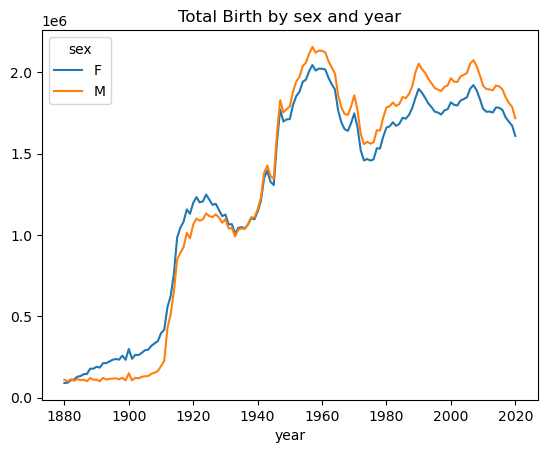

In [7]:
# Plot'Total Birth by sex and year'

total_birth_US.plot(title='Total Birth by sex and year')

In [8]:
#Displaying a table to print percentage of baby name in each year

def add_popular_name(popular_name):
    popular_name['popular_name']=((popular_name.birth/popular_name.birth.sum())*100)
    return popular_name

name=name.groupby(['year','sex']).apply(add_popular_name)
name

,name,sex,birth,year,popular_name
0,Mary,F,7065,1880,7.764248
1,Anna,F,2604,1880,2.861727
2,Emma,F,2003,1880,2.201244
3,Elizabeth,F,1939,1880,2.130910
4,Minnie,F,1746,1880,1.918808
...,...,...,...,...,...
2021239,Zykell,M,5,2020,0.000291
2021240,Zylus,M,5,2020,0.000291
2021241,Zymari,M,5,2020,0.000291
2021242,Zyn,M,5,2020,0.000291


In [9]:
def top_name(popular_name):
    return popular_name.sort_values(by='birth',ascending=False)[:10]
p_name=name.groupby(['sex','birth'])
top_100=p_name.apply(top_name)
top_100.reset_index(inplace=True,drop=True)

In [10]:
# Analysing naming trends

boy_name = top_100[top_100.sex == 'M']
girl_name = top_100[top_100.sex == 'F']
total_birth = top_100.pivot_table('birth', index = 'year', columns = 'name', aggfunc = sum)

In [11]:
boy_name.head()

,name,sex,birth,year,popular_name
35484,Ab,M,5,1880,0.004525
35485,Slaten,M,5,2001,0.000257
35486,Starling,M,5,2001,0.000257
35487,Star,M,5,2001,0.000257
35488,Stanly,M,5,2001,0.000257


In [12]:
girl_name.head()

,name,sex,birth,year,popular_name
0,Adelle,F,5,1880,0.005495
1,Coutney,F,5,2000,0.000275
2,Cris,F,5,2000,0.000275
3,Crosby,F,5,2000,0.000275
4,Crystalee,F,5,2000,0.000275
